# Import Module and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
event_data = pd.read_csv('data/all_user_event_data.csv')
profile_data = pd.read_csv('data/all_user_profile_data.csv')
repo_data = pd.read_csv('data/all_user_repo_data.csv')
starred_data = pd.read_csv('data/all_user_starred_data.csv')

In [3]:
all_users = set(repo_data['user_alias'].unique())

In [4]:
users_with_python = set(repo_data[repo_data['language'] == 'Python']['user_alias'].unique())

In [5]:
users_without_python = list(all_users - users_with_python)

In [6]:
len(all_users), len(users_without_python)

(8465, 2945)

In [7]:
event_data = event_data[~event_data['user_alias'].isin(users_without_python)]
profile_data = profile_data[~profile_data['user_alias'].isin(users_without_python)]
repo_data = repo_data[~repo_data['user_alias'].isin(users_without_python)]
starred_data = starred_data[~starred_data['user_alias'].isin(users_without_python)]

# Profile Data

In [8]:
profile_data['followers'].fillna(0, inplace=True)
profile_data['following'].fillna(0, inplace=True)
profile_data['public_repos'].fillna(0, inplace=True)
profile_data['public_gists'].fillna(0, inplace=True)
profile_data['hireable'].fillna(False, inplace=True)

In [9]:
profile_data.head()

,user_alias,type,hireable,location,followers,following,public_repos,public_gists,created_at,updated_at
3,usr3,User,True,Karachi,0.0,0.0,5.0,0.0,2021-09-24T09:04:40Z,2023-05-02T19:11:00Z
5,usr5,User,True,Remote,0.0,6.0,22.0,7.0,2022-06-02T04:04:01Z,2023-12-21T10:06:23Z
6,usr6,User,True,NaN,1.0,2.0,19.0,0.0,2021-08-20T19:03:28Z,2023-12-18T08:21:10Z
7,usr7,User,True,Iran,3.0,7.0,16.0,0.0,2021-06-03T12:52:25Z,2023-10-13T17:19:17Z
9,usr9,User,False,Kiev/Lviv,0.0,0.0,16.0,0.0,2019-04-03T19:46:09Z,2023-03-13T20:20:03Z


In [10]:
profile_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5638 entries, 3 to 8579
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_alias    5638 non-null   object 
 1   type          5638 non-null   object 
 2   hireable      5638 non-null   bool   
 3   location      3216 non-null   object 
 4   followers     5638 non-null   float64
 5   following     5638 non-null   float64
 6   public_repos  5638 non-null   float64
 7   public_gists  5638 non-null   float64
 8   created_at    5638 non-null   object 
 9   updated_at    5638 non-null   object 
dtypes: bool(1), float64(4), object(5)
memory usage: 446.0+ KB


In [11]:
profile_data.describe()

,followers,following,public_repos,public_gists
count,5638.000000,5638.000000,5638.000000,5638.000000
mean,21.079638,18.500177,24.866265,1.706811
std,267.387484,228.724665,36.814378,14.632221
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,8.000000,0.000000
50%,2.000000,3.000000,16.000000,0.000000
75%,9.000000,10.000000,30.000000,0.000000
max,14753.000000,15337.000000,1096.000000,760.000000


In [12]:
profile_data.isnull().sum()

user_alias         0
type               0
hireable           0
location        2422
followers          0
following          0
public_repos       0
public_gists       0
created_at         0
updated_at         0
dtype: int64

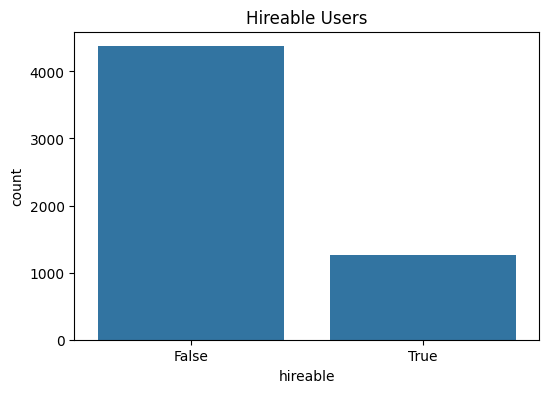

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=profile_data, x='hireable')
plt.title('Hireable Users')
plt.show()

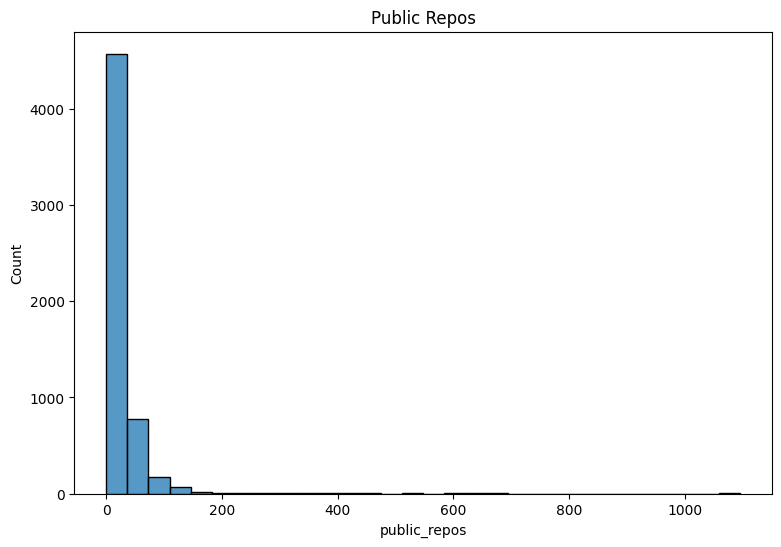

In [14]:
plt.figure(figsize=(9, 6))
sns.histplot(data=profile_data, x='public_repos', bins=30)
plt.title('Public Repos')
plt.show()

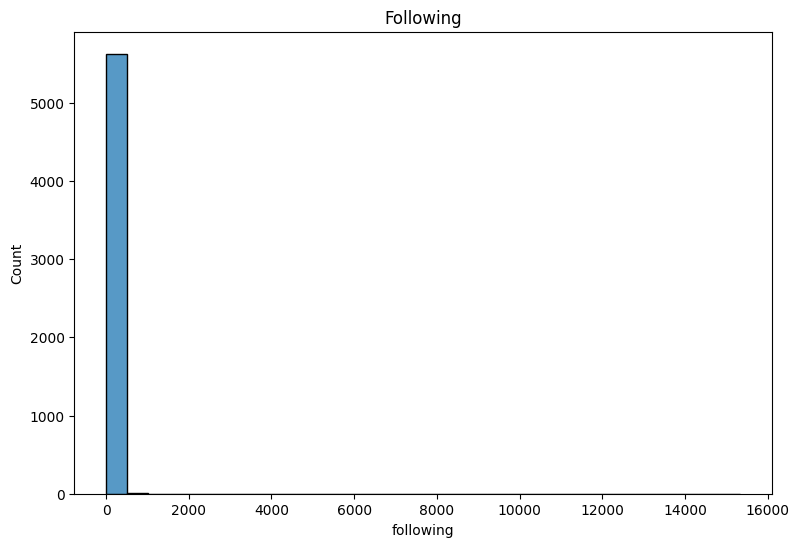

In [15]:
plt.figure(figsize=(9, 6))
sns.histplot(data=profile_data, x='following', bins=30)
plt.title('Following')
plt.show()

In [16]:
log_followers = np.log(profile_data['followers'] + 1)

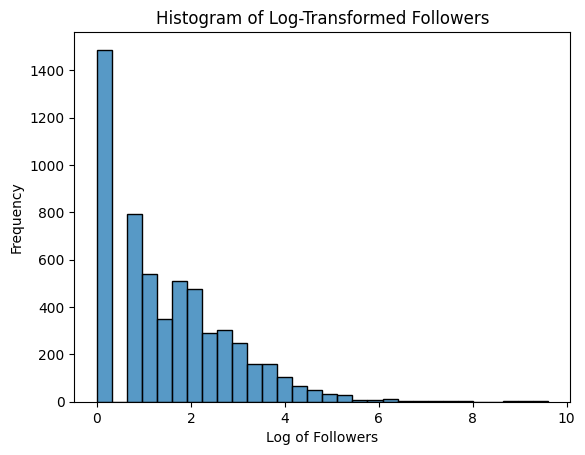

In [17]:
sns.histplot(log_followers, bins=30)

plt.xlabel('Log of Followers')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Followers')

plt.show()

From the histogram of the log-transformed followers, it appears that a significant number of users have between 0 and 2 log of followers. Therefore, for further data analysis I set a threshold at around 4 to focus on users with a higher follower count while retaining a substantial portion of dataset.

In [18]:
threshold = np.exp(4)

In [19]:
threshold

54.598150033144236

In [20]:
high_follower_users = profile_data[profile_data['followers'] > threshold]
low_follower_users = profile_data[profile_data['followers'] <= threshold]

In [21]:
len(profile_data)

5638

In [22]:
len(high_follower_users), len(low_follower_users)

(259, 5379)

# Event Data

In [23]:
event_data.head()

,user_alias,event_type,created_at
41,usr5,WatchEvent,2024-01-11T13:04:19Z
42,usr5,PushEvent,2024-01-06T03:48:18Z
43,usr5,PushEvent,2024-01-02T16:43:32Z
44,usr5,CreateEvent,2023-12-28T09:35:34Z
45,usr5,CreateEvent,2023-12-28T05:03:51Z


In [24]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134458 entries, 41 to 185069
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_alias  134458 non-null  object
 1   event_type  133426 non-null  object
 2   created_at  133426 non-null  object
dtypes: object(3)
memory usage: 4.1+ MB


In [25]:
event_data.describe()

,user_alias,event_type,created_at
count,134458,133426,133426
unique,3965,16,128756
top,usr8394,PushEvent,2023-12-11T18:25:02Z
freq,300,75026,11


In [26]:
event_data.isnull().sum()

user_alias       0
event_type    1032
created_at    1032
dtype: int64

In [27]:
event_data = event_data[event_data['event_type'] != 'event_type']

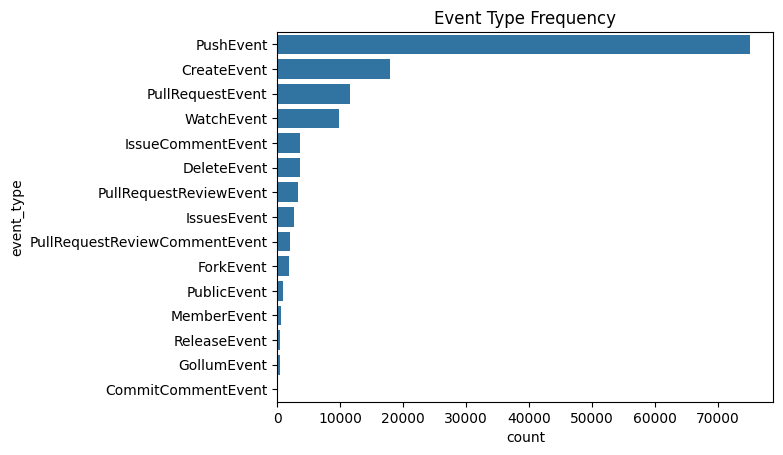

In [28]:
order = event_data['event_type'].value_counts().index
sns.countplot(data=event_data, y='event_type', order=order)
plt.title('Event Type Frequency')
plt.show()

# Repo Data

In [29]:
repo_data['description'].fillna('', inplace=True)
repo_data['topics'].fillna('', inplace=True)
repo_data['stargazers_count'].fillna(0, inplace=True)
repo_data['forks'].fillna(0, inplace=True)
repo_data['fork'].fillna('False', inplace=True)

In [30]:
repo_data.head()

,user_alias,description,fork,stargazers_count,language,topics,forks
105,usr3,ZABx Blockchain is a public/layer 2 and PoS Bl...,False,0.0,JavaScript,blockchain/ethereum,0.0
106,usr3,Hospital Management System in Java,False,0.0,Java,,0.0
107,usr3,This is A Point of Sales Management made by me...,False,0.0,C,,0.0
108,usr3,Book Recommendation System In Python,False,0.0,Python,ai/python,0.0
109,usr3,Bus Ticketing System in Java,False,0.0,Java,,0.0


In [31]:
repo_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130072 entries, 105 to 181591
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_alias        130072 non-null  object 
 1   description       130072 non-null  object 
 2   fork              130072 non-null  object 
 3   stargazers_count  130072 non-null  float64
 4   language          98767 non-null   object 
 5   topics            130072 non-null  object 
 6   forks             130072 non-null  float64
dtypes: float64(2), object(5)
memory usage: 7.9+ MB


In [32]:
repo_data.describe()

,stargazers_count,forks
count,130072.000000,130072.000000
mean,1.944784,0.629490
std,116.556736,30.955435
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,34729.000000,6472.000000


In [33]:
repo_data.isnull().sum()

user_alias              0
description             0
fork                    0
stargazers_count        0
language            31305
topics                  0
forks                   0
dtype: int64

In [34]:
language_counts = repo_data['language'].value_counts()

In [35]:
top_20_languages = language_counts[:20]

repo_data['language_top20'] = repo_data['language'].where(repo_data['language'].isin(top_20_languages.index), 'Other')
repo_data_plot = repo_data[repo_data['language_top20'] != 'Other']

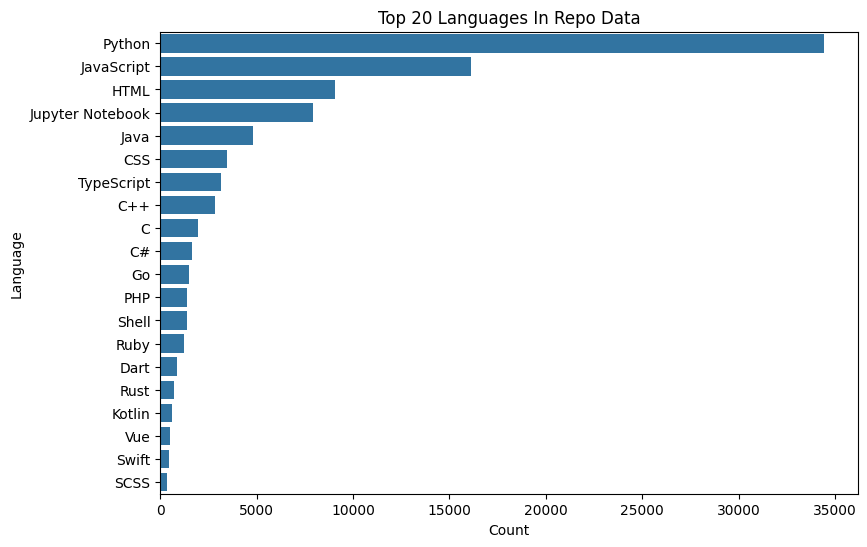

In [36]:
plt.figure(figsize=(9, 6))
sns.countplot(data=repo_data_plot, y='language_top20', order=repo_data_plot['language_top20'].value_counts().index)
plt.title('Top 20 Languages In Repo Data')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

In [37]:
repo_data['topics'] = repo_data['topics'].str.split('/')

In [38]:
topics_df = repo_data.explode('topics')
topics_df = topics_df[topics_df['topics'] != '']
topics_df = topics_df.drop(['description', 'fork', 'stargazers_count', 'language', 'forks'], axis=1)

In [39]:
topic_counts = topics_df['topics'].value_counts()
top_20_topics = topic_counts[:20]

In [40]:
top_20_topics

topics
python                   2214
django                    803
config                    797
github-config             792
javascript                671
python3                   617
css                       440
html                      432
react                     429
machine-learning          363
docker                    323
django-rest-framework     314
reactjs                   309
java                      280
flask                     264
postgresql                233
nodejs                    232
api                       231
html5                     227
deep-learning             203
Name: count, dtype: int64

In [41]:
topics_df['topics_top20'] = topics_df['topics'].where(topics_df['topics'].isin(top_20_topics.index), 'Other')
topics_df = topics_df[topics_df['topics_top20'] != 'Other']

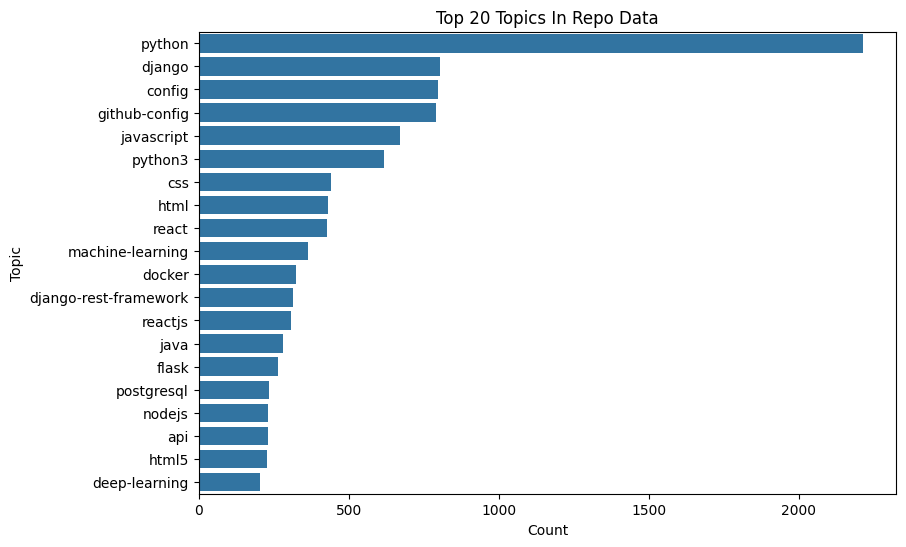

In [42]:
plt.figure(figsize=(9, 6))
sns.countplot(data=topics_df, y='topics_top20', order=topics_df['topics_top20'].value_counts().index)
plt.title('Top 20 Topics In Repo Data')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

In [43]:
repo_data['description'].value_counts()[:20]

description
                                                                                                                                                                            56497
Config files for my GitHub profile.                                                                                                                                           805
Im now a ALX Student/this is my first repository as a full-stack engineer                                                                                                     148
A robot powered training repository :robot:                                                                                                                                    74
The Web framework for perfectionists with deadlines.                                                                                                                           66
Created with CodeSandbox                                                                          

# Starred Data

In [44]:
starred_data['stargazers_count'].fillna(0, inplace=True)
starred_data['description'].fillna('', inplace=True)
starred_data['topics'].fillna('', inplace=True)

In [45]:
starred_data.head()

,user_alias,full_name,html_url,description,language,topics,stargazers_count
12,usr5,qtchaos/py_mega_account_generator,https://github.com/qtchaos/py_mega_account_gen...,🤖 Create and manage MEGA accounts with ease/up...,Python,generator/mega/mega-nz/mega-nz-account-creator...,44.0
13,usr5,januusio/cryptowallet_risk_scoring,https://github.com/januusio/cryptowallet_risk_...,A free cryptowallet risk scoring tool with ful...,Python,anti-money-laundering/bitcoin/cryptocurrency/c...,213.0
14,usr6,jordan-cutler/path-to-senior-engineer-handbook,https://github.com/jordan-cutler/path-to-senio...,All the resources you need to get to Senior En...,NaN,awesome/career/career-growth/path-to-senior/se...,6300.0
15,usr6,microsoft/Data-Science-For-Beginners,https://github.com/microsoft/Data-Science-For-...,10 Weeks/20 Lessons/Data Science for All!,Jupyter Notebook,data-analysis/data-science/data-visualization/...,25421.0
16,usr6,microsoft/AI-For-Beginners,https://github.com/microsoft/AI-For-Beginners,12 Weeks/24 Lessons/AI for All!,Jupyter Notebook,ai/artificial-intelligence/cnn/computer-vision...,26810.0


In [46]:
starred_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90928 entries, 12 to 118762
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_alias        90928 non-null  object 
 1   full_name         90928 non-null  object 
 2   html_url          90928 non-null  object 
 3   description       90928 non-null  object 
 4   language          80815 non-null  object 
 5   topics            90928 non-null  object 
 6   stargazers_count  90928 non-null  float64
dtypes: float64(1), object(6)
memory usage: 5.5+ MB


In [47]:
starred_data.describe()

,stargazers_count
count,90928.000000
mean,17719.668661
std,44085.966956
min,0.000000
25%,36.000000
50%,1529.000000
75%,13556.000000
max,381613.000000


In [48]:
starred_data.isnull().sum()

user_alias              0
full_name               0
html_url                0
description             0
language            10113
topics                  0
stargazers_count        0
dtype: int64

In [49]:
language_counts = starred_data['language'].value_counts()

In [50]:
top_20_languages = language_counts[:20]

starred_data['language_top20'] = starred_data['language'].where(starred_data['language'].isin(top_20_languages.index), 'Other')
starred_data_plot = starred_data[starred_data['language_top20'] != 'Other']

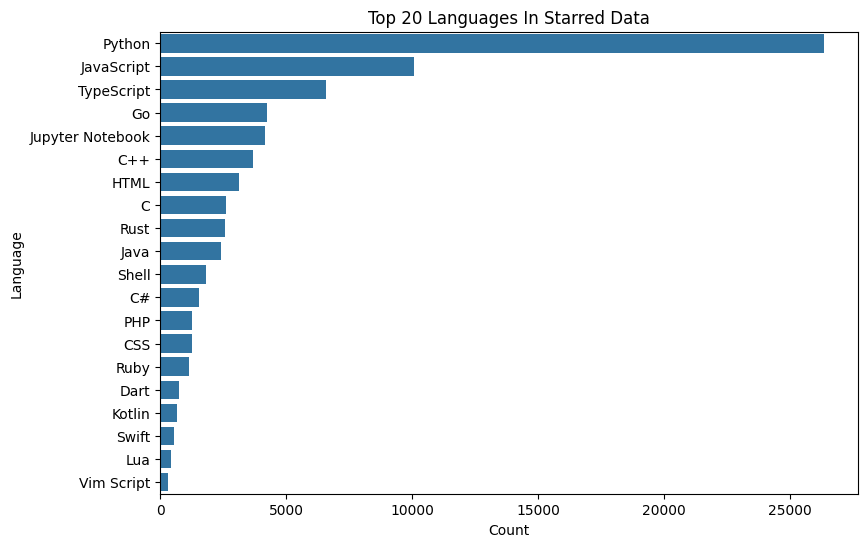

In [51]:
plt.figure(figsize=(9, 6))
sns.countplot(data=starred_data_plot, y='language_top20', order=starred_data_plot['language_top20'].value_counts().index)
plt.title('Top 20 Languages In Starred Data')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

In [52]:
starred_data['topics'] = starred_data['topics'].str.split('/')

In [53]:
topics_df = starred_data.explode('topics')
topics_df = topics_df[topics_df['topics'] != '']
topics_df = topics_df.drop(['full_name', 'html_url', 'description', 'stargazers_count', 'language'], axis=1)

In [54]:
topic_counts = topics_df['topics'].value_counts()
top_20_topics = topic_counts[:20]

In [55]:
top_20_topics

topics
python              13362
hacktoberfest        8015
javascript           5278
machine-learning     3699
react                3194
deep-learning        3014
typescript           2242
golang               2197
awesome-list         2169
django               2163
awesome              2125
go                   2102
rust                 2046
python3              1945
docker               1827
nodejs               1824
linux                1702
data-science         1682
api                  1533
pytorch              1527
Name: count, dtype: int64

In [56]:
topics_df['topics_top20'] = topics_df['topics'].where(topics_df['topics'].isin(top_20_topics.index), 'Other')
topics_df = topics_df[topics_df['topics_top20'] != 'Other']

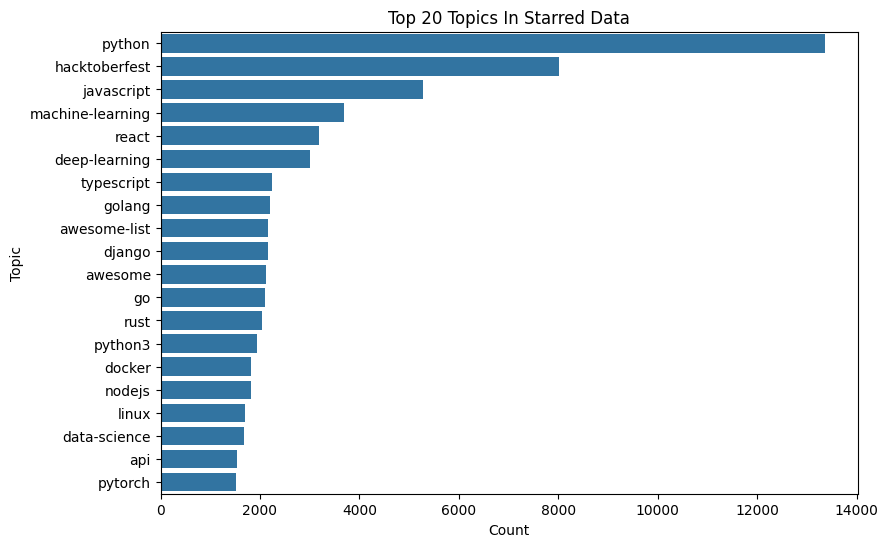

In [57]:
plt.figure(figsize=(9, 6))
sns.countplot(data=topics_df, y='topics_top20', order=topics_df['topics_top20'].value_counts().index)
plt.title('Top 20 Topics In Starred Data')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

In [58]:
starred_data['full_name'].value_counts()[:20]

full_name
public-apis/public-apis                       231
TheAlgorithms/Python                          221
django/django                                 213
vinta/awesome-python                          210
kamranahmedse/developer-roadmap               209
jwasham/coding-interview-university           190
tiangolo/fastapi                              189
EbookFoundation/free-programming-books        179
donnemartin/system-design-primer              169
codecrafters-io/build-your-own-x              157
python/cpython                                122
encode/django-rest-framework                  113
torvalds/linux                                111
sindresorhus/awesome                          108
ossu/computer-science                         107
practical-tutorials/project-based-learning    107
freeCodeCamp/freeCodeCamp                     105
ohmyzsh/ohmyzsh                                90
anuraghazra/github-readme-stats                88
trekhleb/javascript-algorithms          

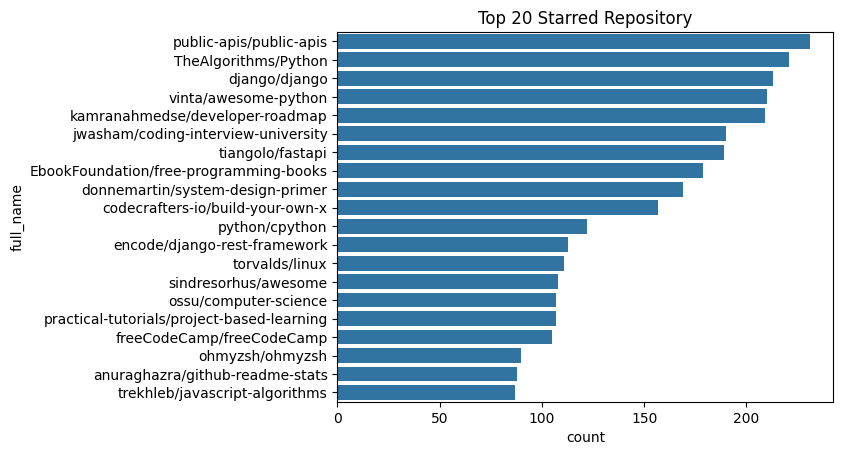

In [59]:
order = starred_data['full_name'].value_counts()[:20].index
sns.countplot(data=starred_data, y='full_name', order=order)
plt.title('Top 20 Starred Repository')
plt.show()

In [60]:
for x in starred_data['full_name'].value_counts()[:20].index.to_list():
    query = starred_data[starred_data['full_name'] == x]
    print(x, '\n:', query['description'].iloc[0], '\n')

public-apis/public-apis 
: A collective list of free APIs 

TheAlgorithms/Python 
: All Algorithms implemented in Python 

django/django 
: The Web framework for perfectionists with deadlines. 

vinta/awesome-python 
: A curated list of awesome Python frameworks/libraries/software and resources 

kamranahmedse/developer-roadmap 
: Interactive roadmaps/guides and other educational content to help developers grow in their careers. 

jwasham/coding-interview-university 
: A complete computer science study plan to become a software engineer. 

tiangolo/fastapi 
: FastAPI framework/high performance/easy to learn/fast to code/ready for production 

EbookFoundation/free-programming-books 
: :books: Freely available programming books 

donnemartin/system-design-primer 
: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards. 

codecrafters-io/build-your-own-x 
: Master programming by recreating your favorite technologies from scratch. 

python